<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#7748a4"> Práctica 6. Algoritmos Cuánticos IV</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-2</font></td>
    </tr>
</table>

<p style="text-align:center; font-weight:bold;">Nombre del Alumno: Rosario Vázquez José André</p>
<p style="text-align:center; font-weight:bold;">Núm. Cuenta: 318353351

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<a id="1"></a>
# Desarrollo

#### 1. Implementa "a mano" la $QFT$ inversa:

1. Esribe el código completo de la Transformada Cuántica de Fourier **Inversa** usando Qiskit.
    1. Crea una función llamada `miQFTInv(n)`, que reciba el número de qubits (`n`).
    2. Usa el orden de Qiskit (revisa el contenido de este Lab6).
    3. No puedes usar la clase `QFT` de Qiskit para crear la función `miQFTInv(n)`.
    4. Debe regresar un objeto de tipo `QuantumCircuit`.
2. Dibuja el circuito correspondiente a la $QFT$ inversa para `n=10`.
    1. Usa la función que escribiste: `miQFTInv(n)`.
3. Haz otra función que realice la verificación de tu función `miQFTInv(n)` para todos los estados posibles **para cualquier `n`**. Esta segunda función debe hacer lo siguiente:
    1. Internamente debe generar todos los posibles estados. Si por ejemplo recibe el parámetro `n=4`, entonces deberá generar $16$ estados iniciales. Usa un ciclo para recorrer todas las posibilidades.
    2. Por cada iteración:
        1. Se debe crear un circuito para cada uno de los posibles estados. Es decir, agrega compuertas $X$ cuando haya un $1$ en el estado. Recuerda que estás trabajando con el orden de Qiskit.
        2. Aplica tu función `miQFTInv(n)`.
        3. Concatena (compone) en el mismo circuito la $QFT$ *normal*, aquí si puedes usar la clase de Qiskit `QFT`.
        4. Agrega mediciones a todos los qubits.
        5. Realiza la simulación del circuito.
            - Se debe hacer una simulación por cada estado posible.
            - **No** muestres un histograma para cada caso.
            - Muestra que la salida del circuito para cada caso es exactamente el mismo estado que el de entrada.
            - Usa $5000$ shots.
            - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
    3. Ejecuta esta segunda función con `n=4`. Deberá generar $16$ resultados.

##### Creación de la función que hace la transformada cuántica Inversa  `miQFTInv(n)`

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np

def miQFTInv(n):
    qftinv_circuit = QuantumCircuit(n)
    
    # Aplica swaps (mismo que en la QFT directa)
    for i in reversed (range(n // 2)):
        qftinv_circuit.swap(i, n - i - 1)

    qftinv_circuit.barrier()
    # Inversa: Aplica las compuertas en orden inverso y con ángulos negativos
    for j in (range(n)):
        for k in range(j):
            qftinv_circuit.cp(-np.pi / 2**(j - k), k, j)
        qftinv_circuit.h(j)
        qftinv_circuit.barrier()

    return qftinv_circuit

##### Dibuja el circuito correspondiente a la $QFT$ inversa para `n=10`.

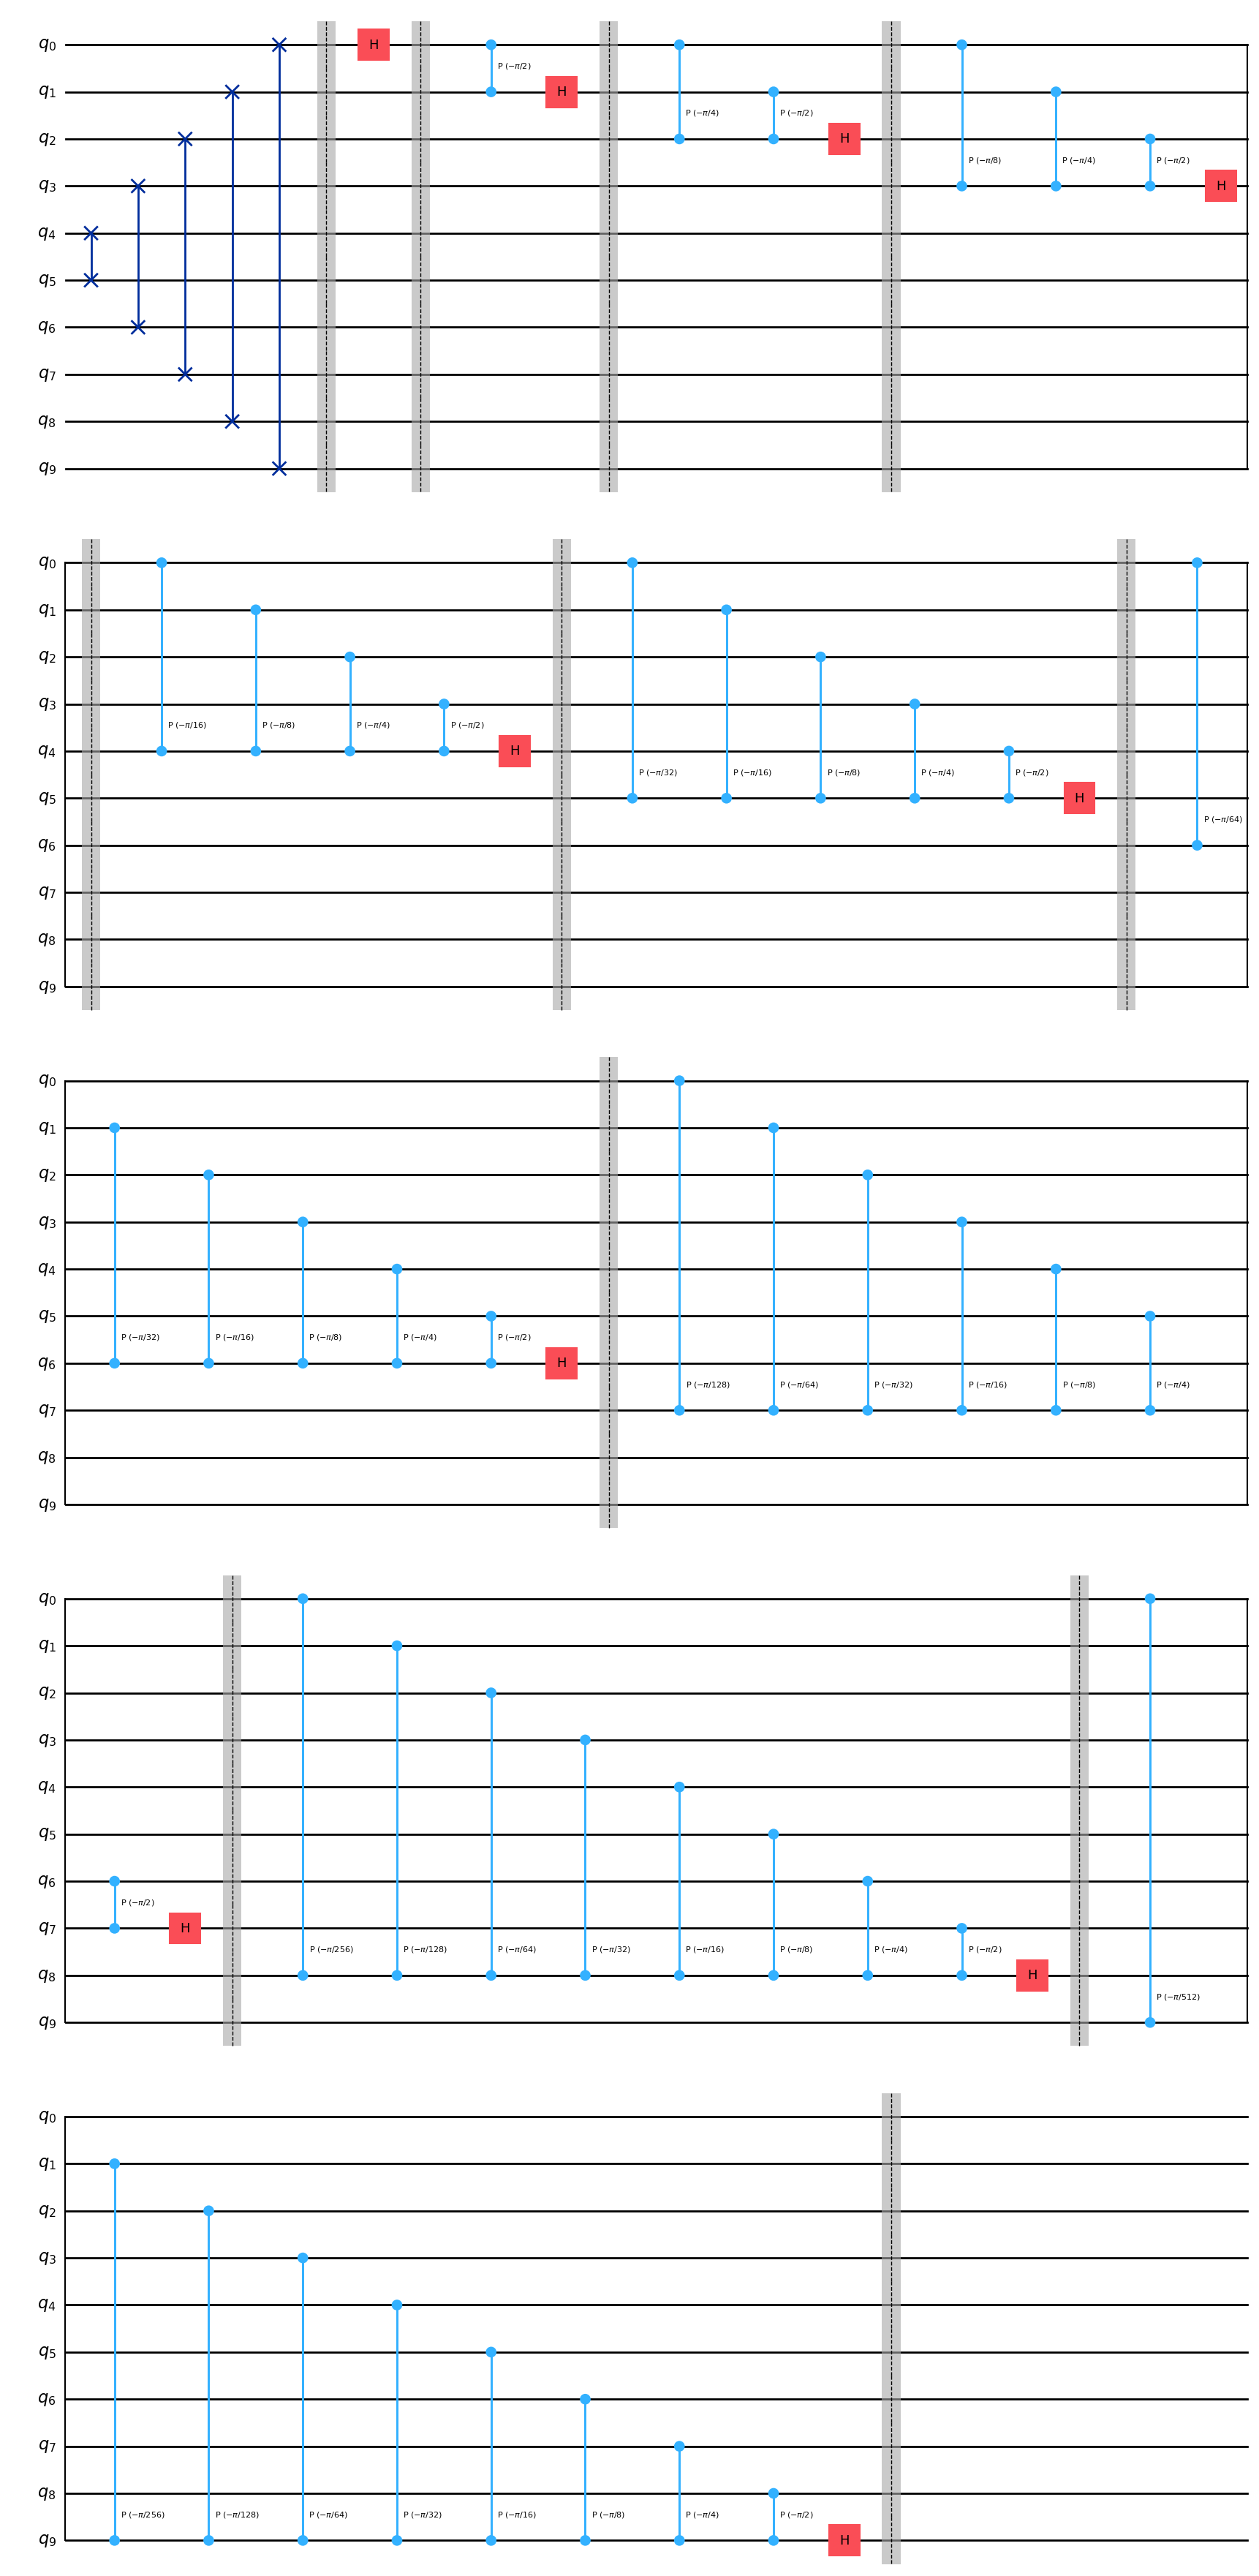

In [2]:
#Llamando a la función miQFTInv(n)
mi_qft_Inv = miQFTInv(10)
mi_qft_Inv.draw('mpl')

##### Haz otra función que realice la verificación de tu función `miQFTInv(n)` para todos los estados posibles **para cualquier `n`**.

In [3]:
#Creando función
def verificar_qft_inv(n):
    # Definiendo el numero de estados iniciales
    total = 2**n

    for i in range(total):
        bin_str = format(i, f'0{n}b')                  # cadena binaria con padding a n bits
        circuito_Estados = QuantumCircuit(n,n)         # Definición del circuito con bits clásicos

        # Preparar el estado base |i⟩
        for idx, bit in enumerate(reversed(bin_str)):  # reversa por convención Qiskit
            if bit == '1':
                circuito_Estados.x(idx)
        circuito_Estados.barrier()

        # Aplicando la función miQFTInv(n)
        qftInv = miQFTInv(n)
        circuitoInv = circuito_Estados.compose(qftInv)               #Agregando la transformada inversa

        # Componiendo la transformada cuántica de Fourier con la clase QFT
        qft = QFT(4, insert_barriers=True)
        circuitoComp = circuitoInv.compose(qft)       #Componiendo la transformada
        circuitoComp.barrier()
        
        #Agregando las mediciones sobre todos los qbits
        for i in range(n):
            circuitoComp.measure(i, i)

        #---------------------- Simulación  -------------------
        # Número de muestras
        shots = 5000

        # Simulación con la clase StatevectorSampler
        sampler = StatevectorSampler()                                  
        job_sampler = sampler.run([circuitoComp], shots=shots)
        conteos = job_sampler.result()[0].data.c.get_counts()  
    
         # Visualización de los resultados de la búsqueda
        for outcome in conteos:
            print("El elemento", outcome, "es observado con probabilidad", conteos[outcome]/shots)
        
        # Mostrando Circuito
        display(circuitoComp.draw('mpl'))
    
    return circuitoComp

##### Ejecuta esta segunda función con `n=4`. Deberá generar $16$ resultados.

El elemento 0000 es observado con probabilidad 1.0


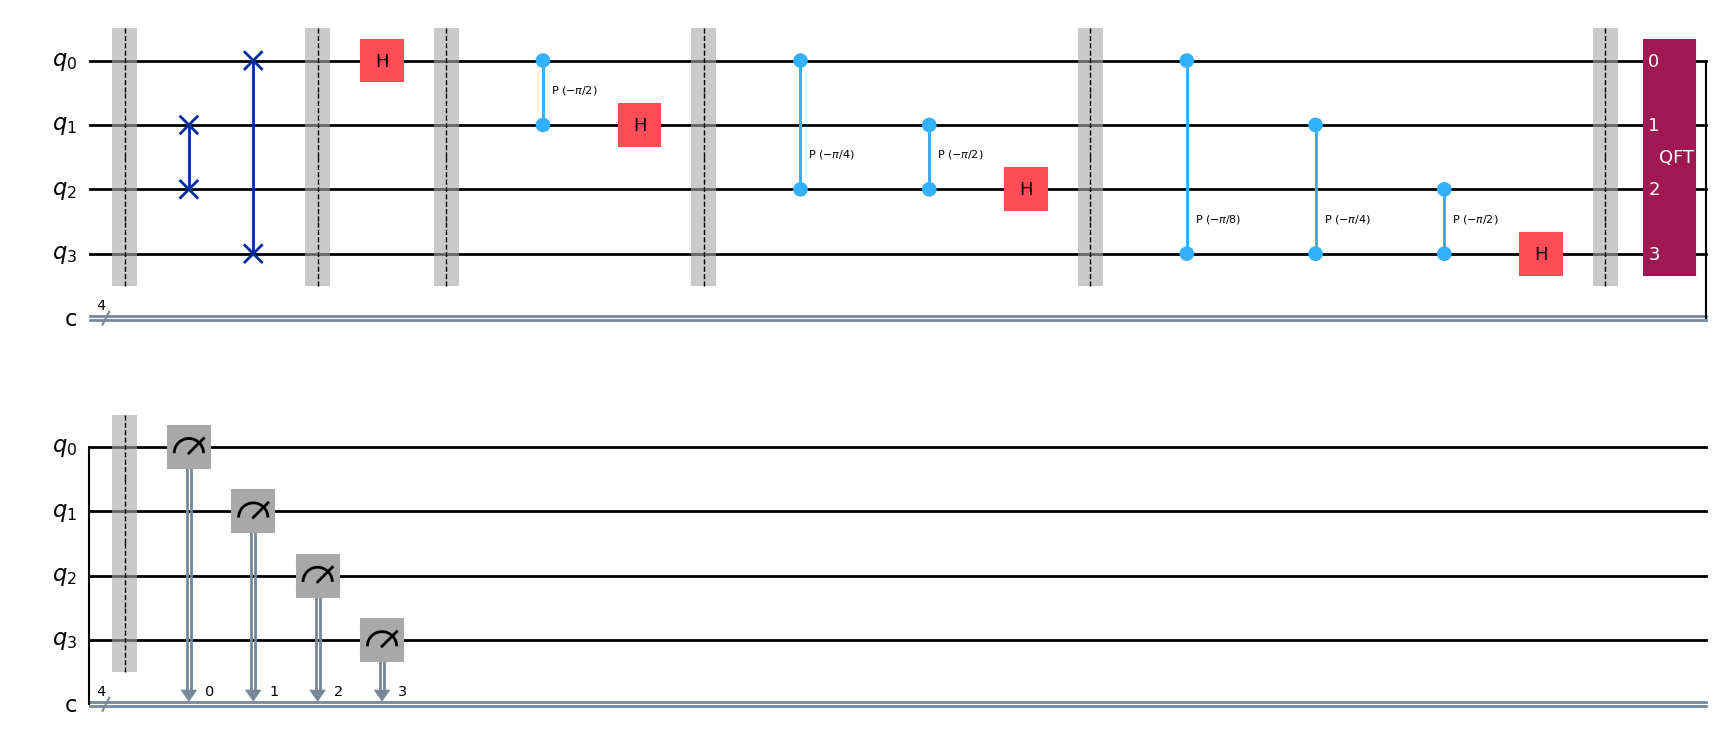

El elemento 0001 es observado con probabilidad 1.0


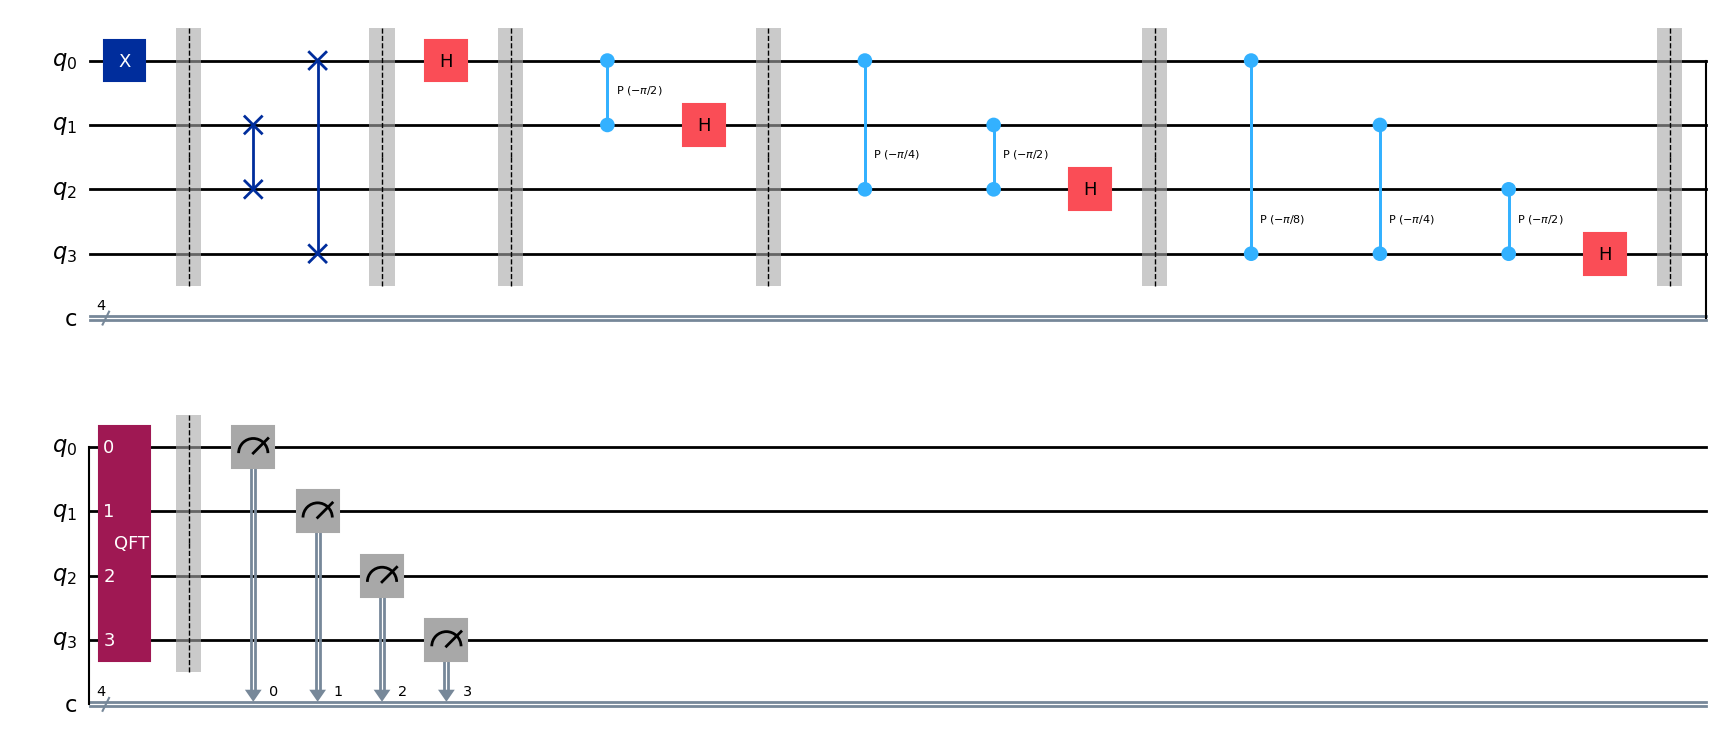

El elemento 0010 es observado con probabilidad 1.0


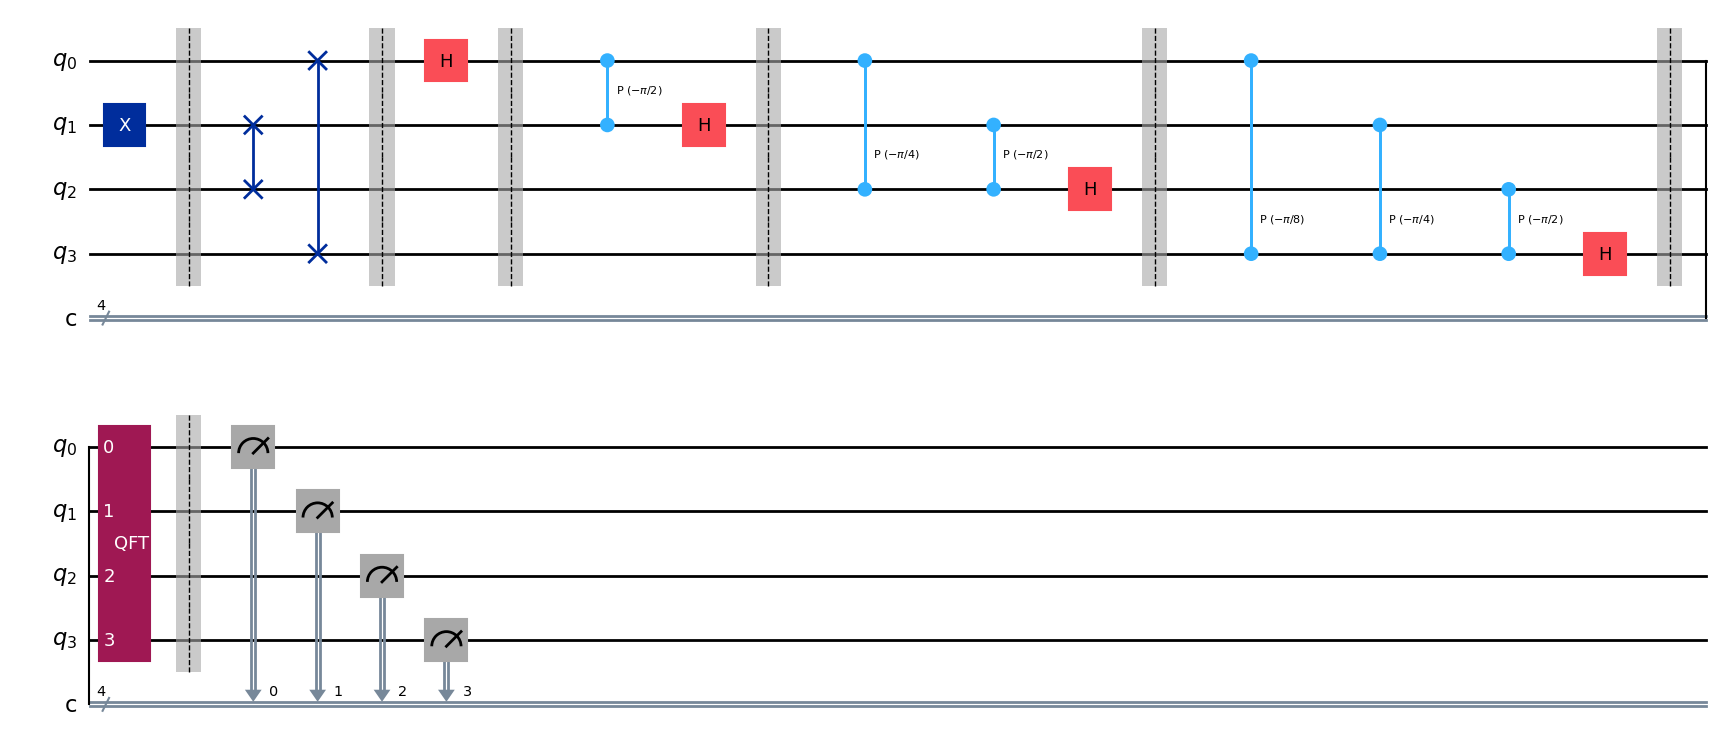

El elemento 0011 es observado con probabilidad 1.0


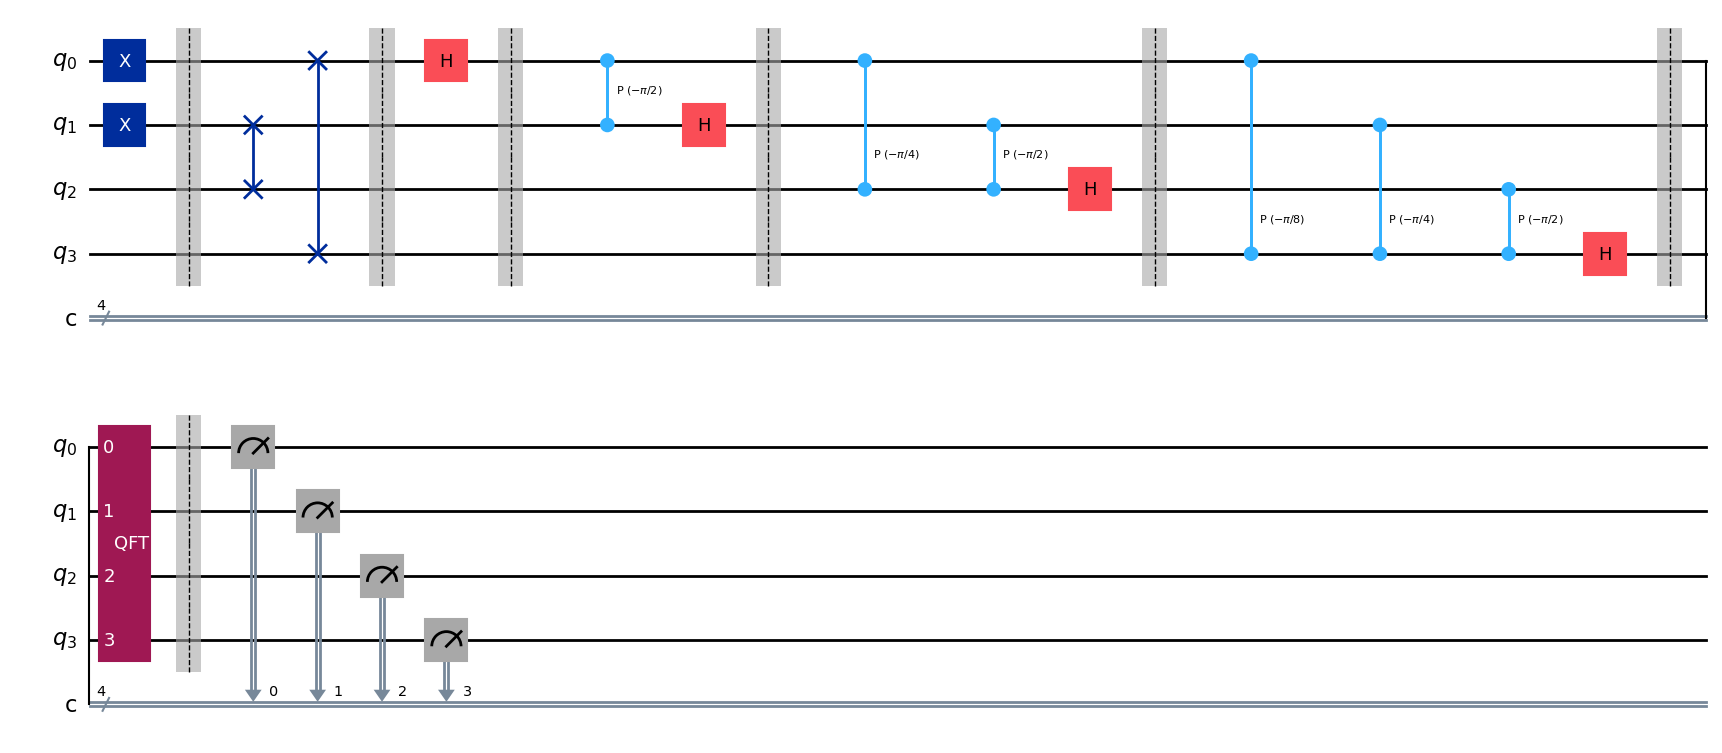

El elemento 0100 es observado con probabilidad 1.0


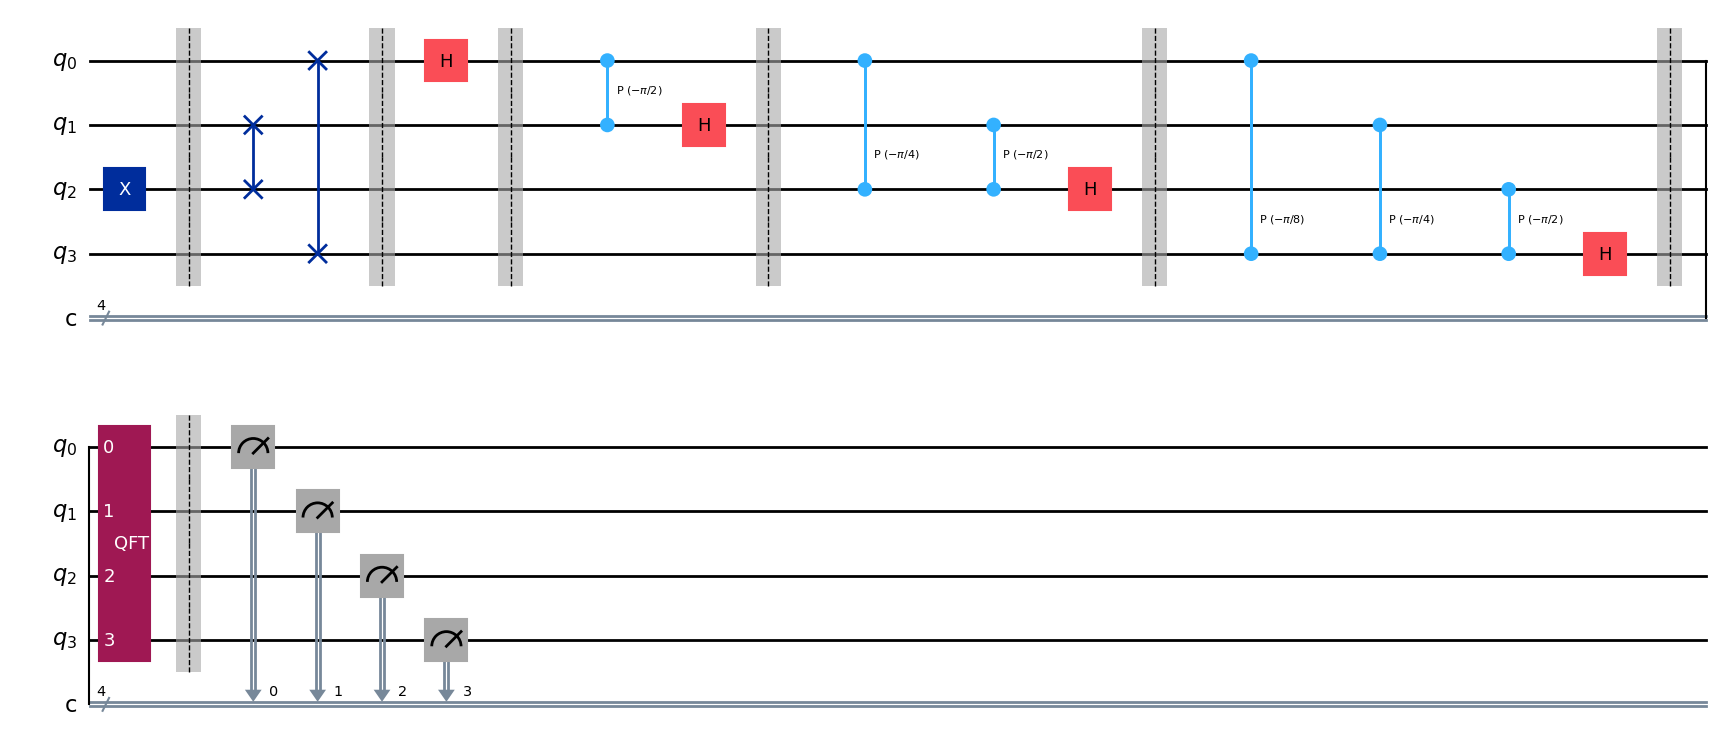

El elemento 0101 es observado con probabilidad 1.0


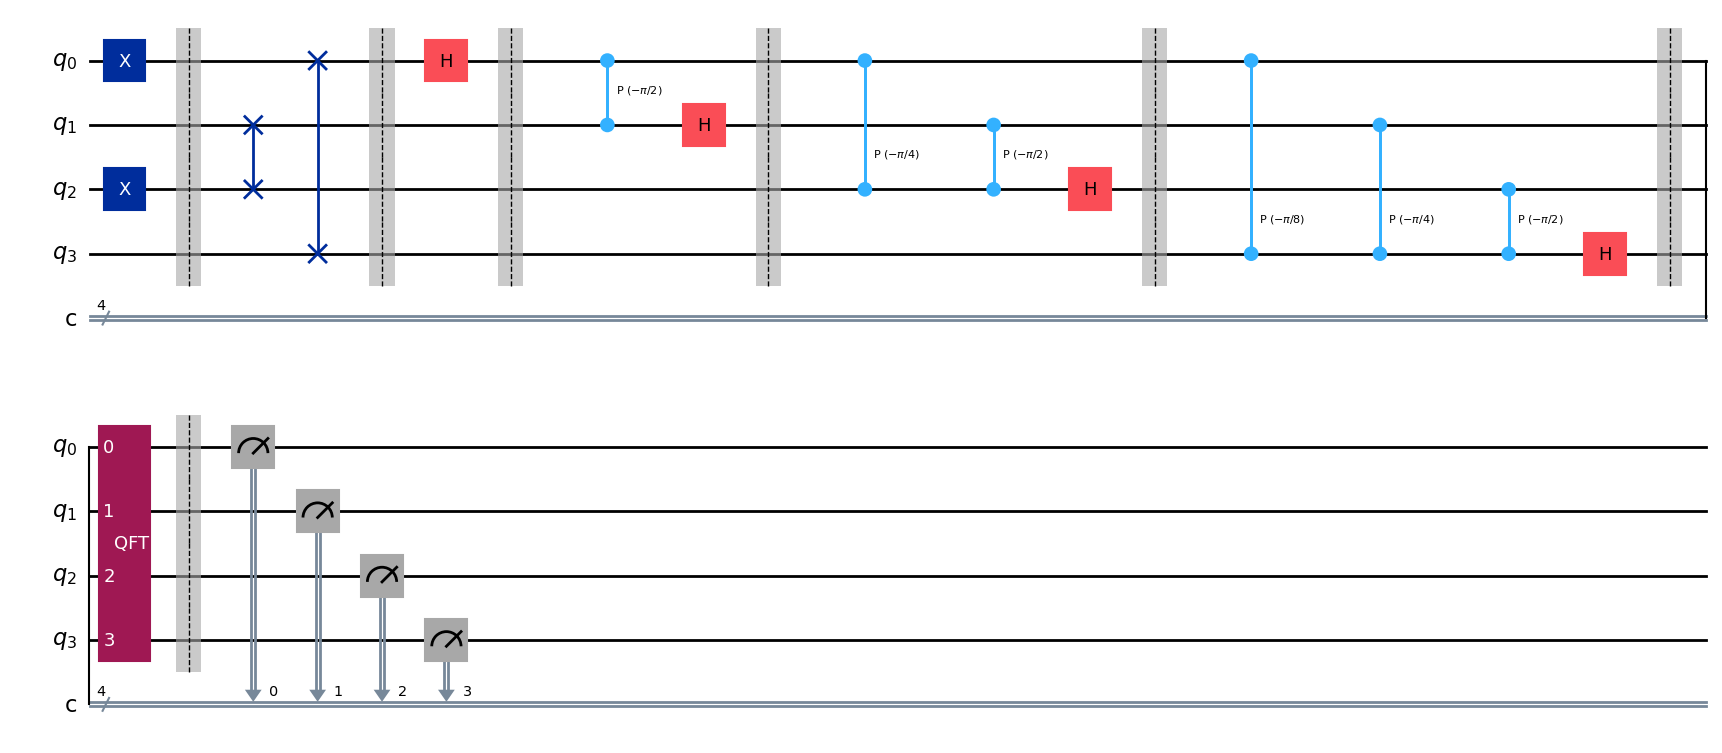

El elemento 0110 es observado con probabilidad 1.0


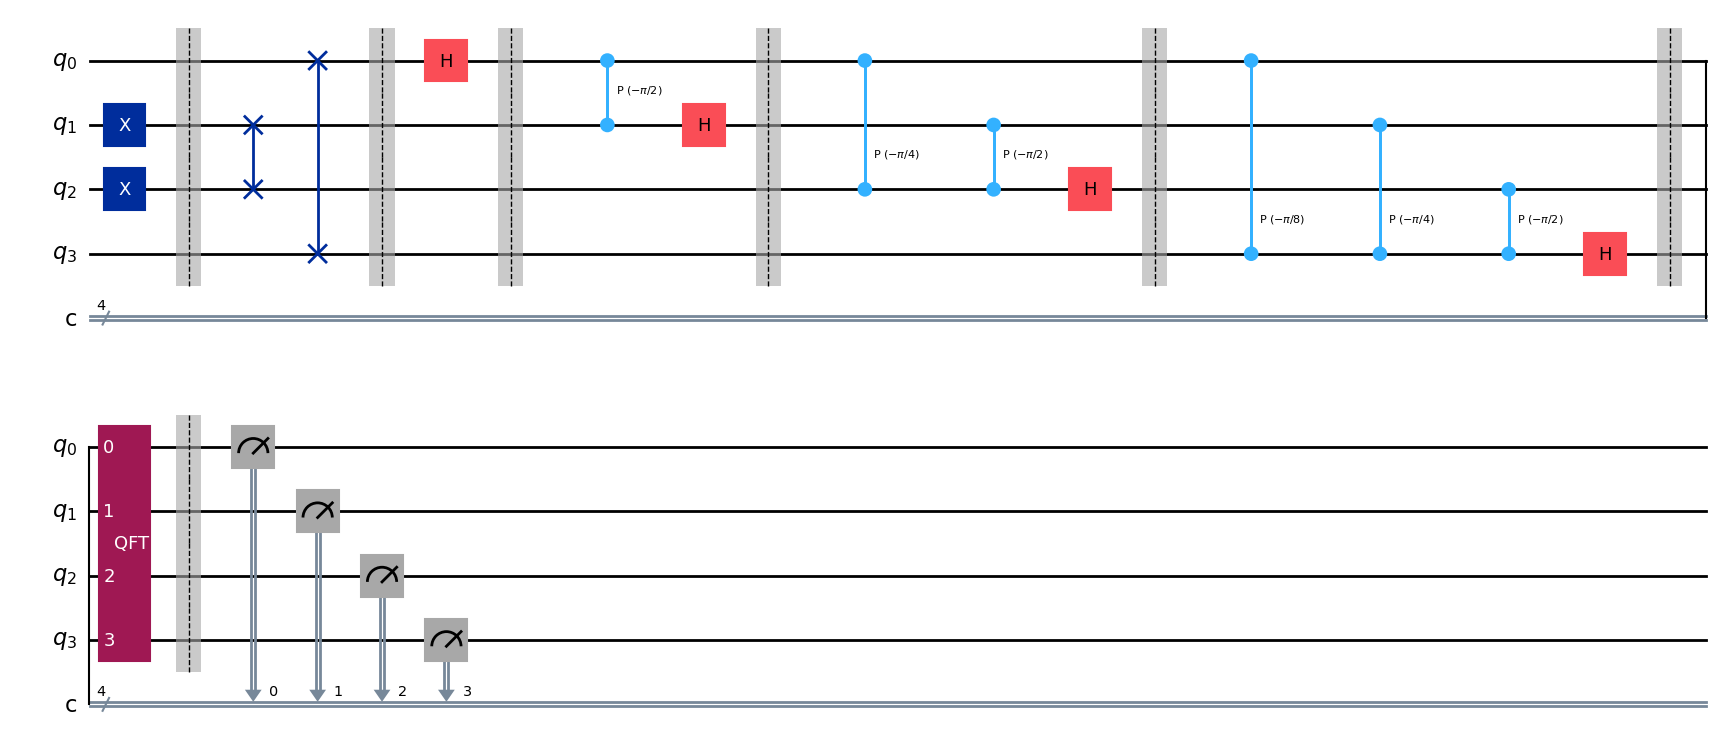

El elemento 0111 es observado con probabilidad 1.0


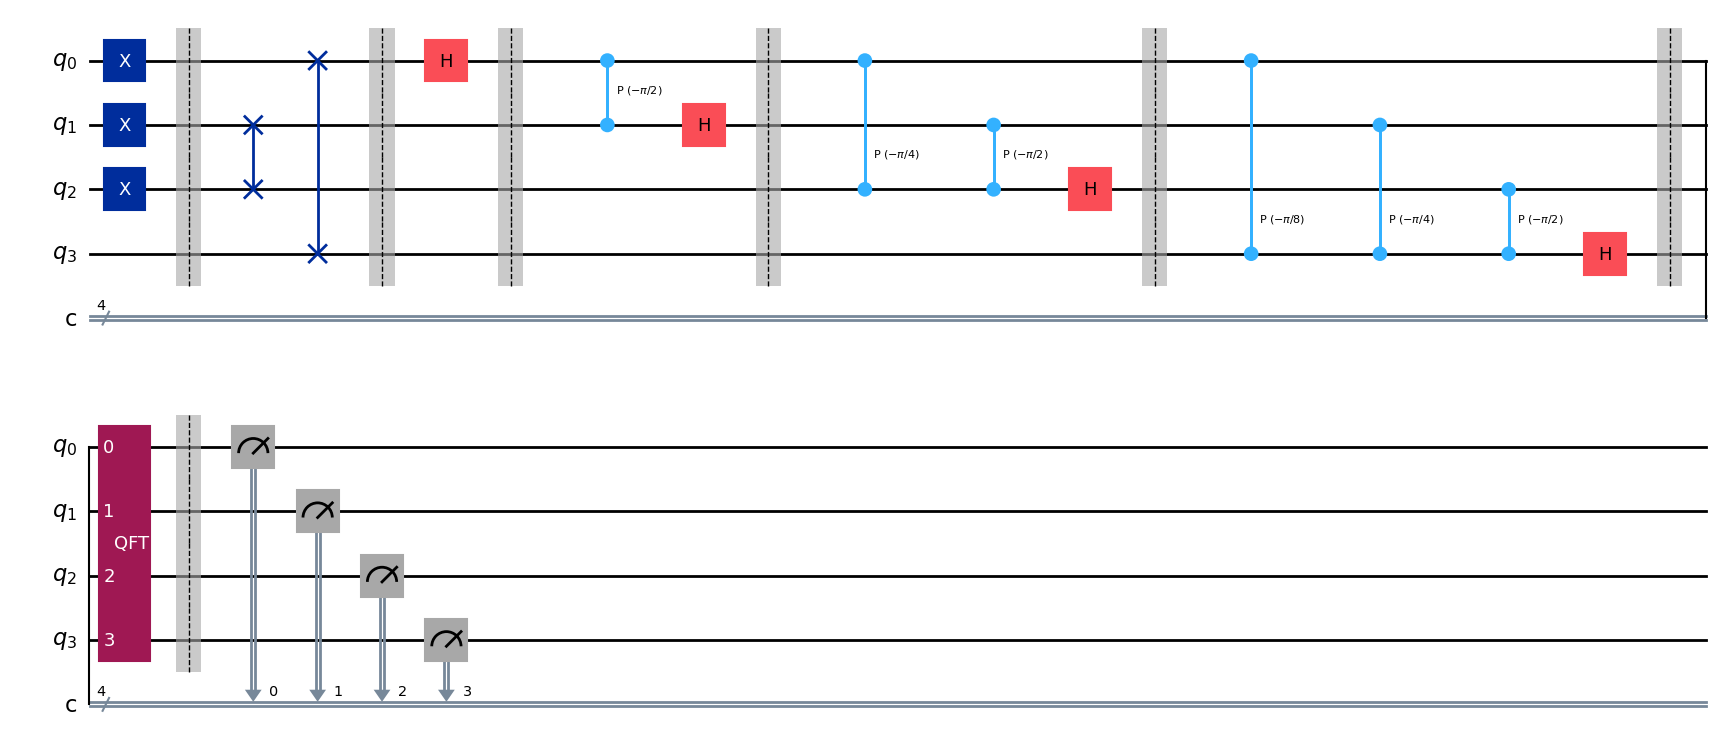

El elemento 1000 es observado con probabilidad 1.0


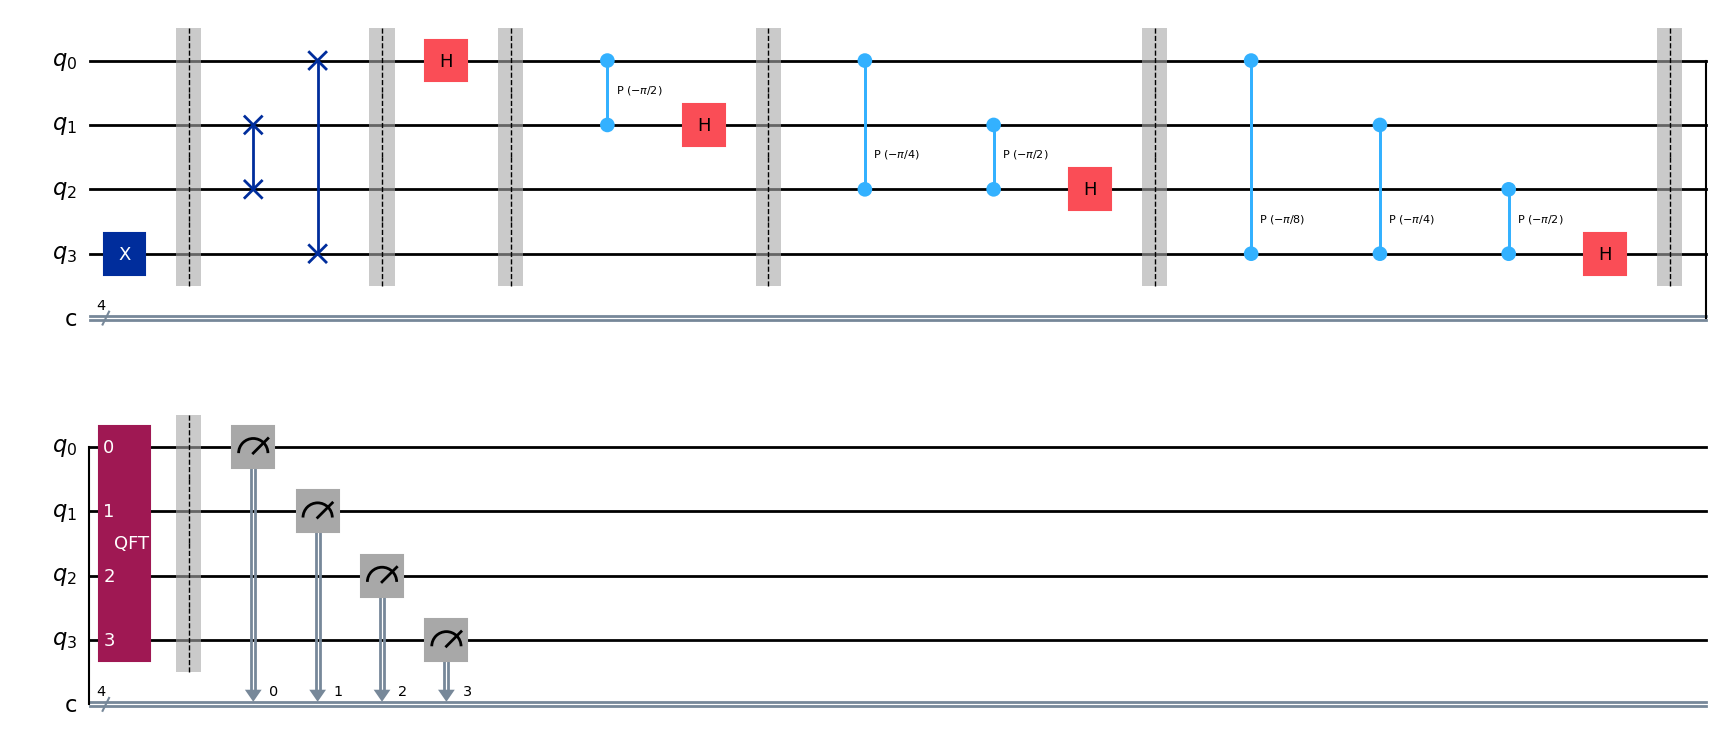

El elemento 1001 es observado con probabilidad 1.0


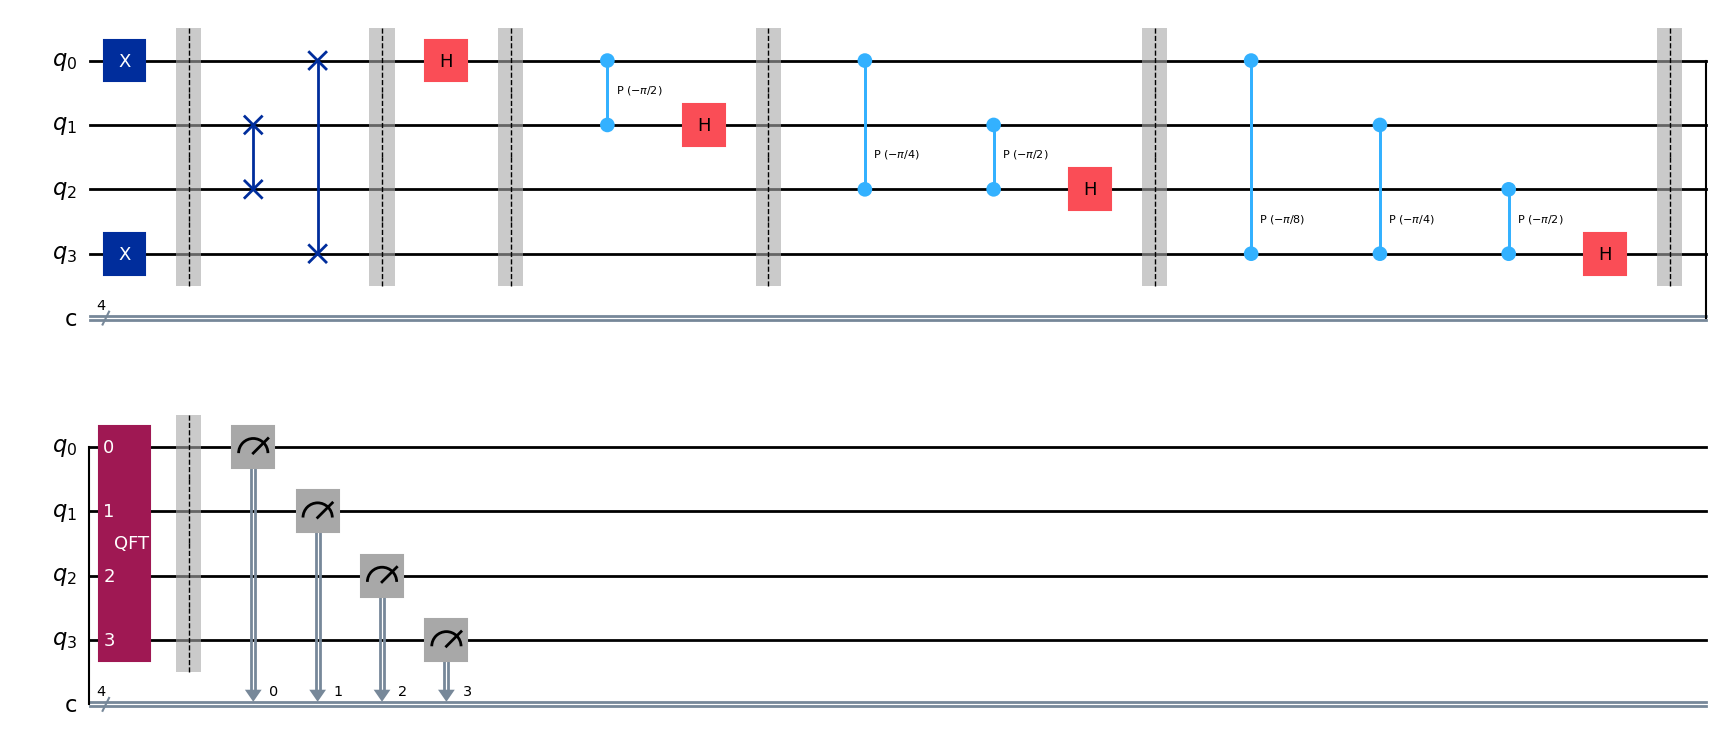

El elemento 1010 es observado con probabilidad 1.0


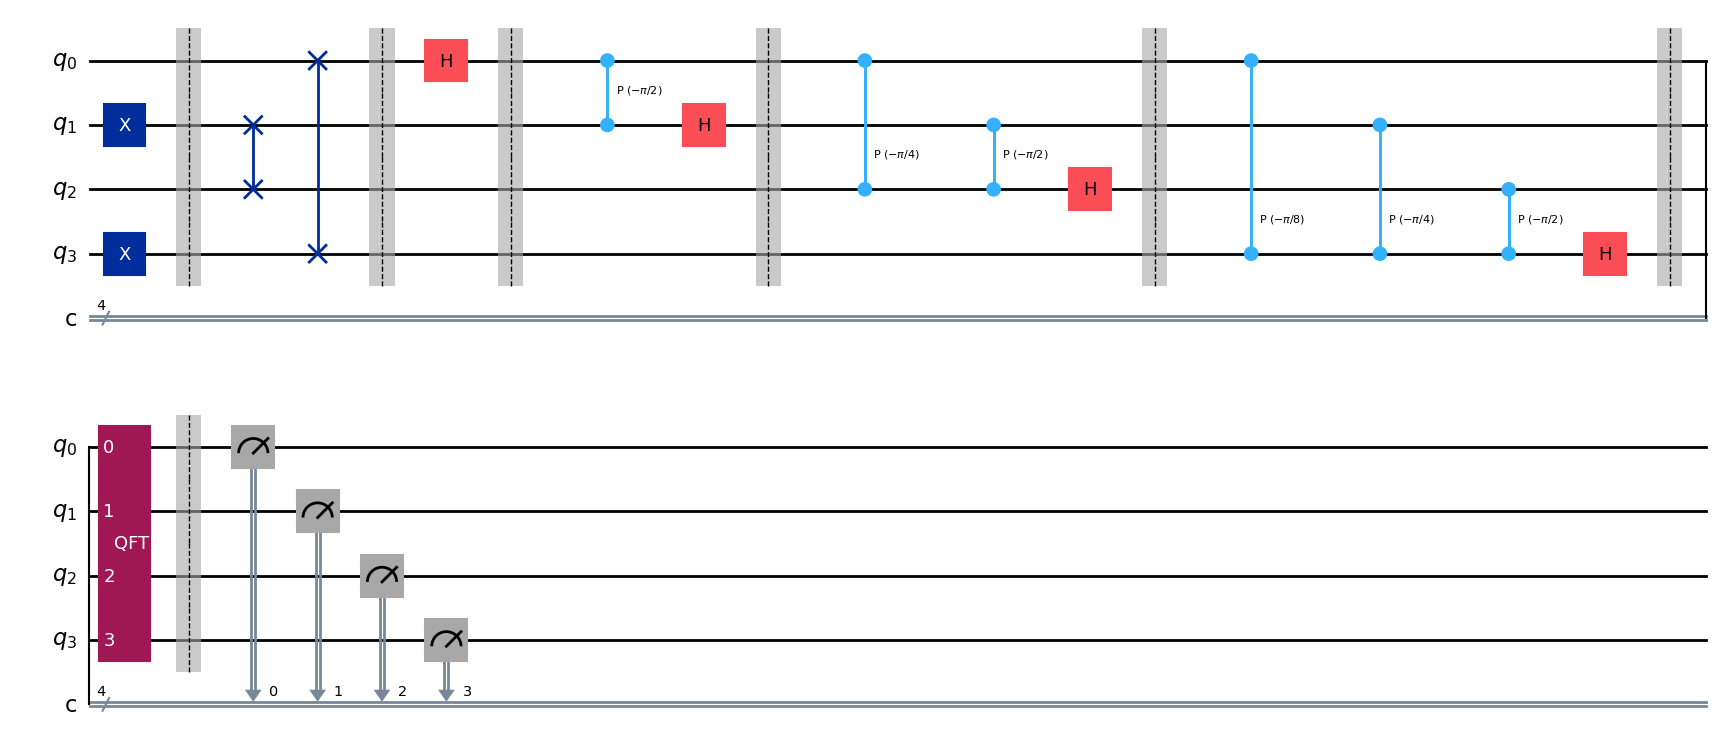

El elemento 1011 es observado con probabilidad 1.0


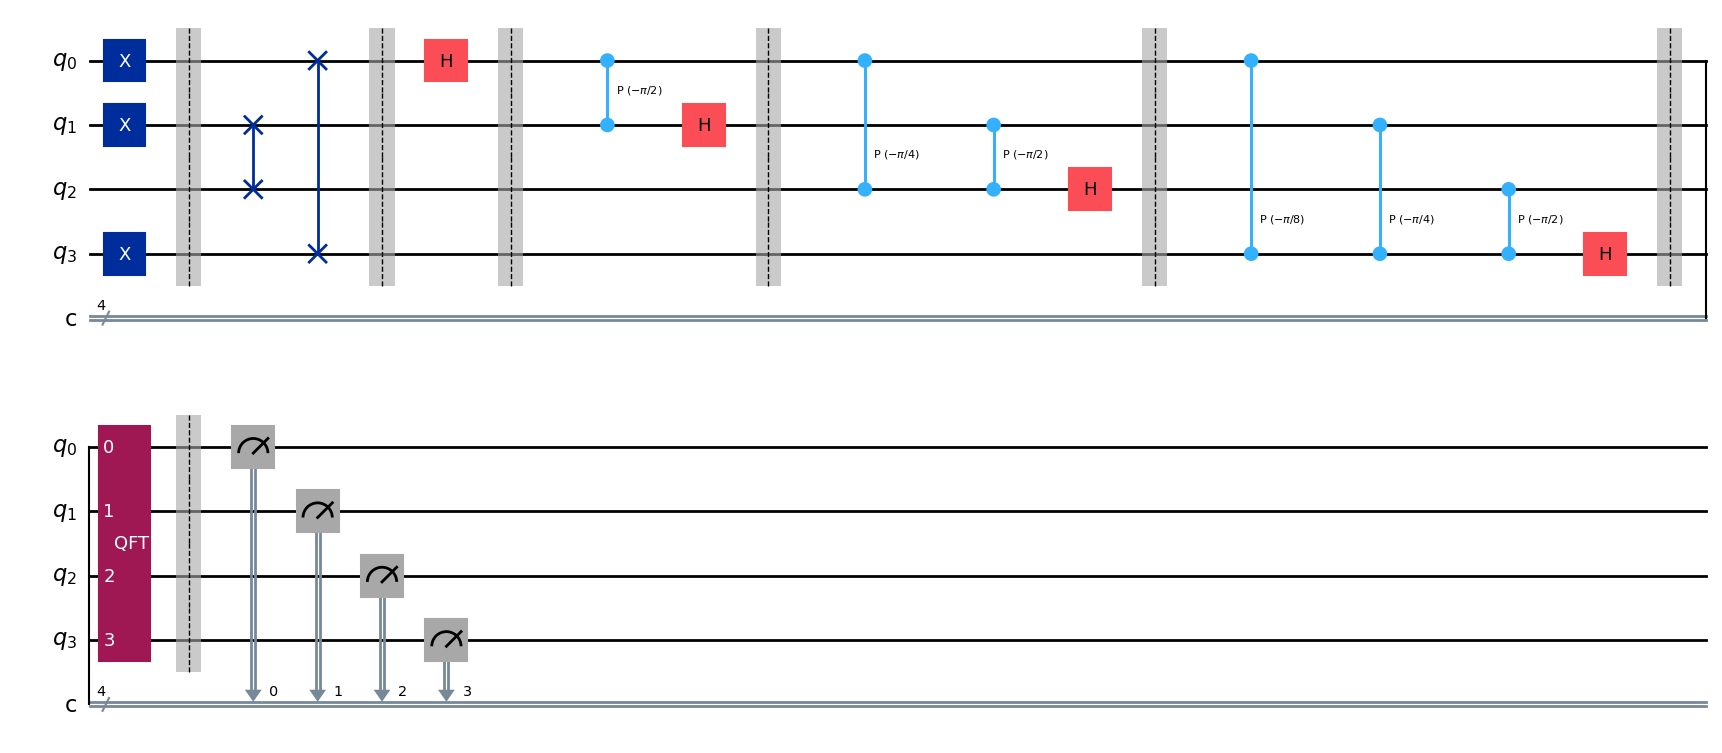

El elemento 1100 es observado con probabilidad 1.0


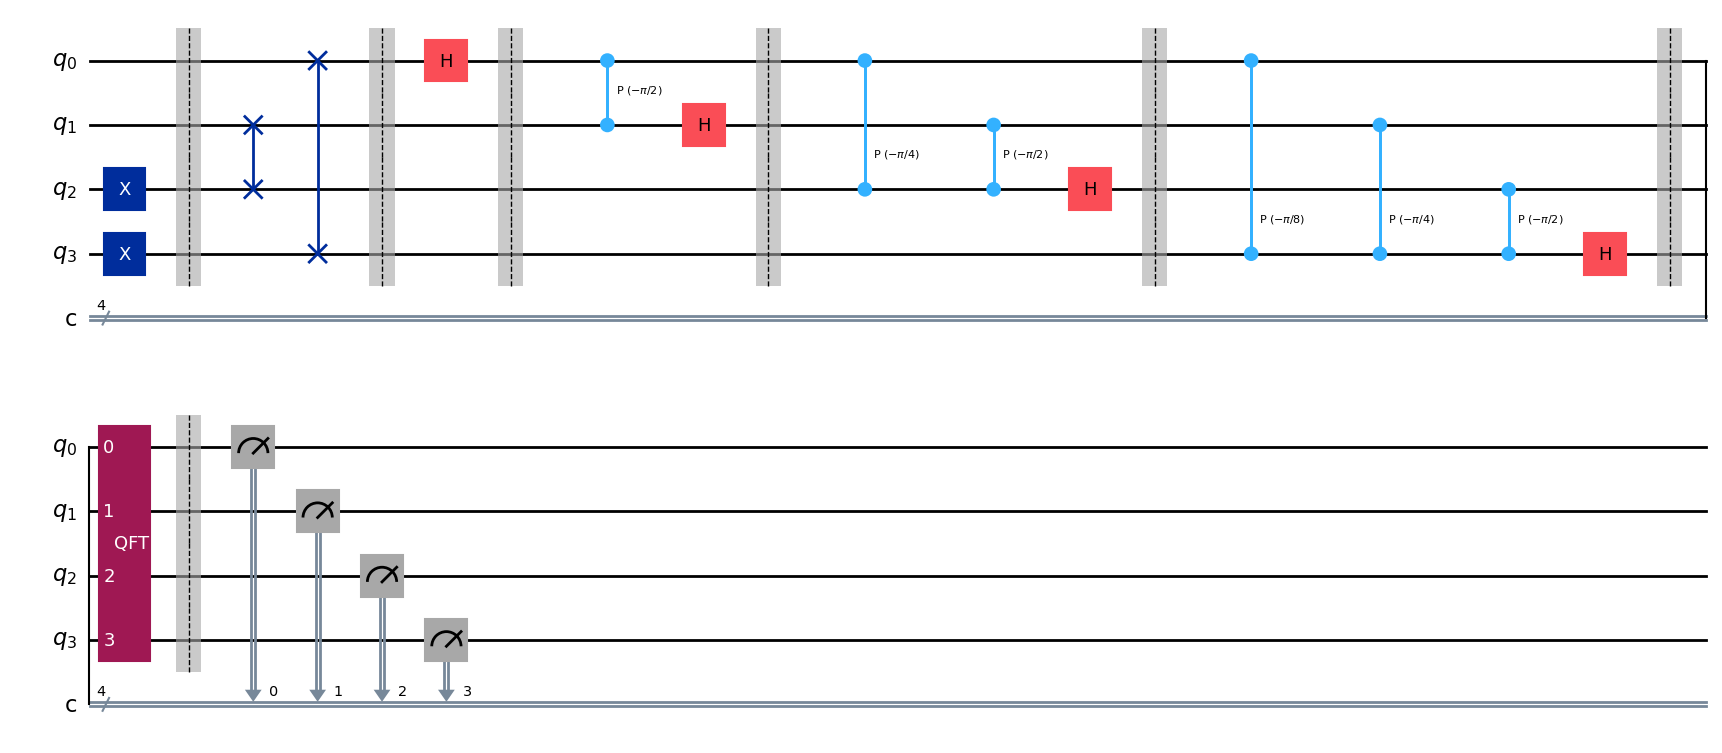

El elemento 1101 es observado con probabilidad 1.0


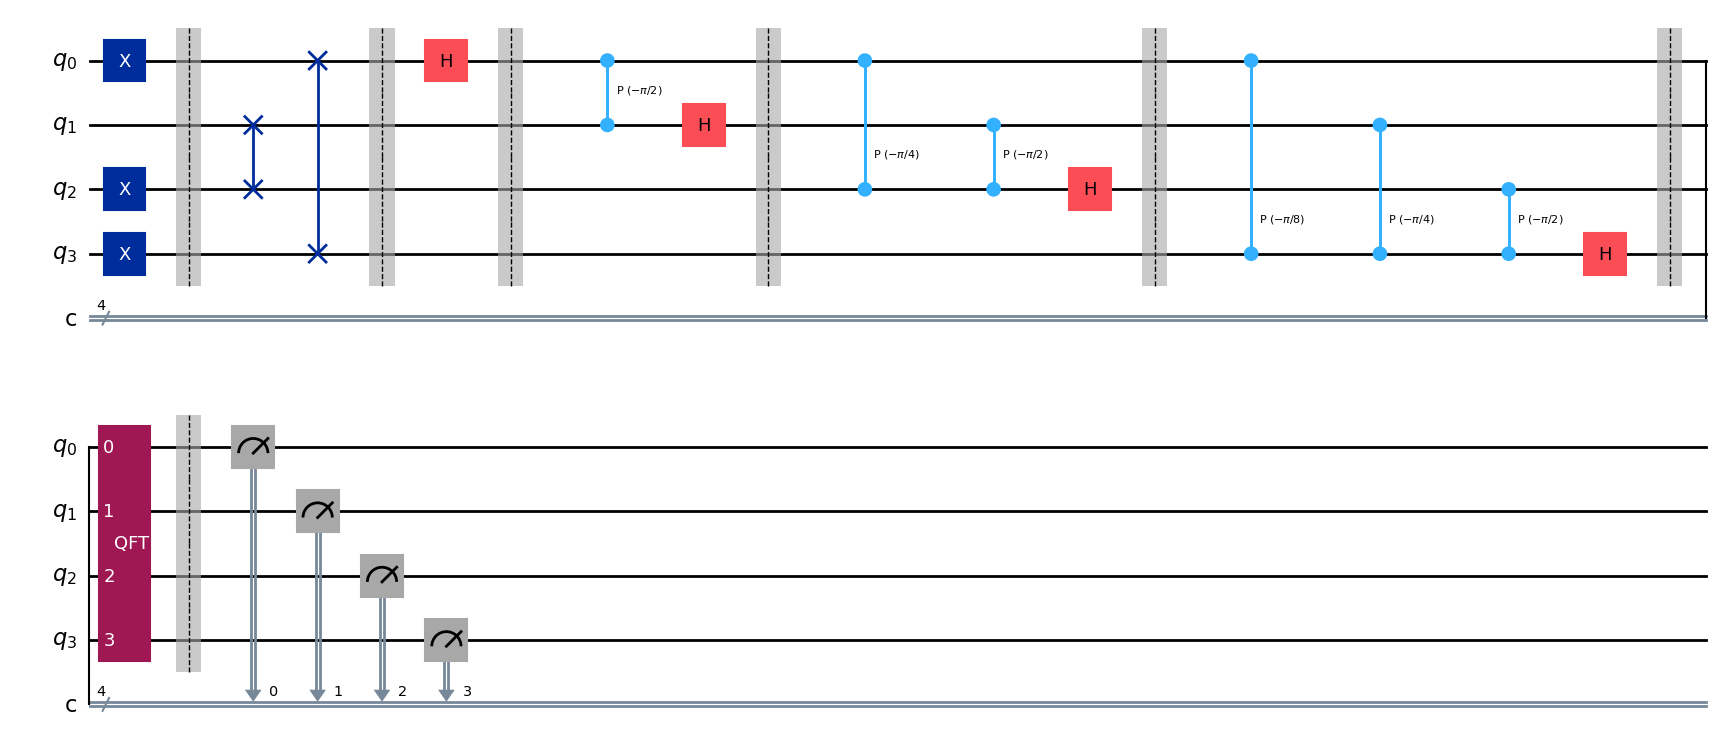

El elemento 1110 es observado con probabilidad 1.0


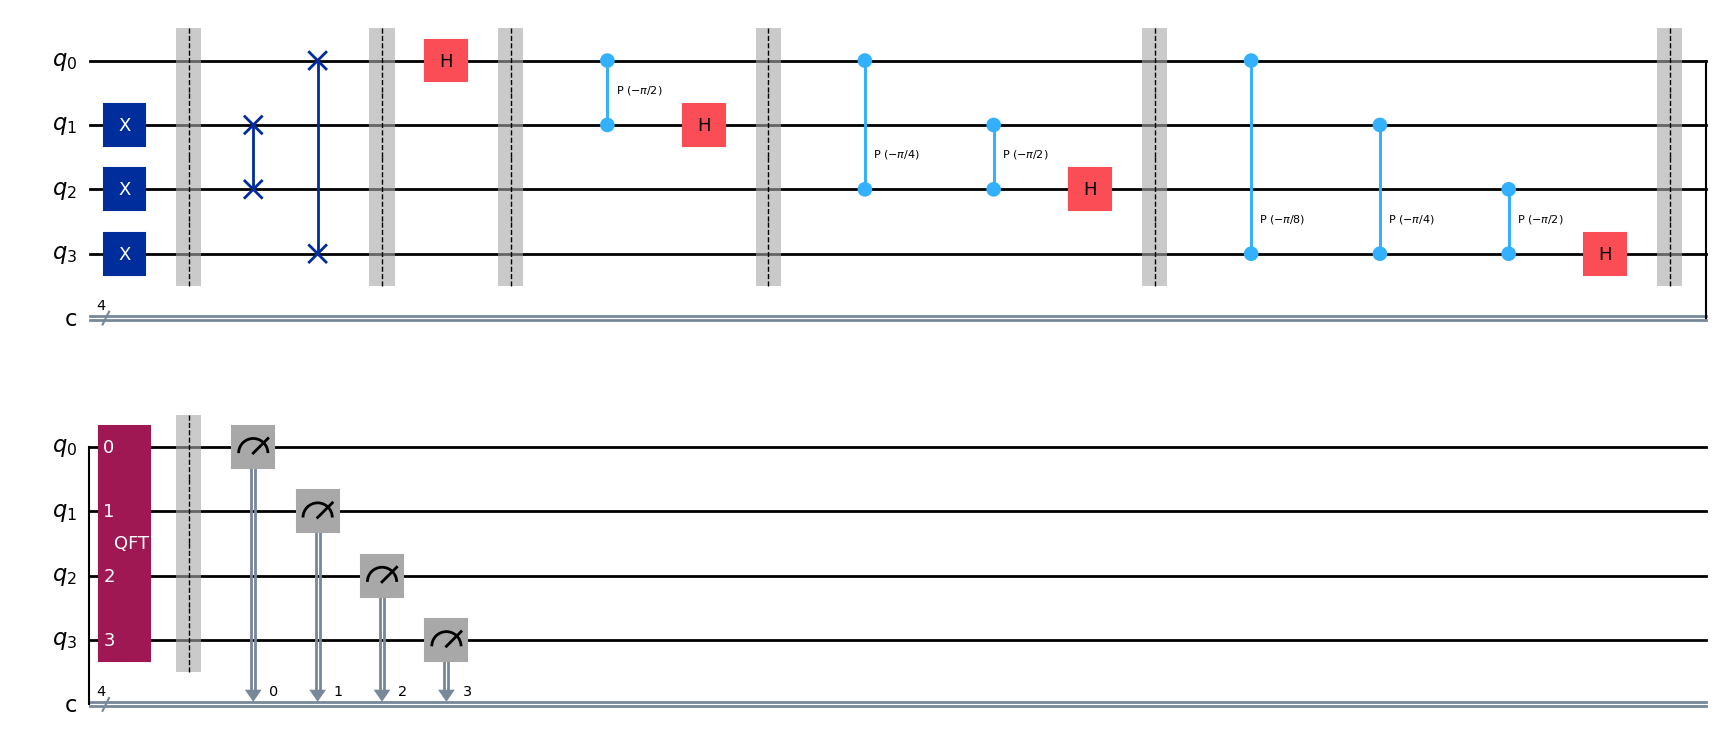

El elemento 1111 es observado con probabilidad 1.0


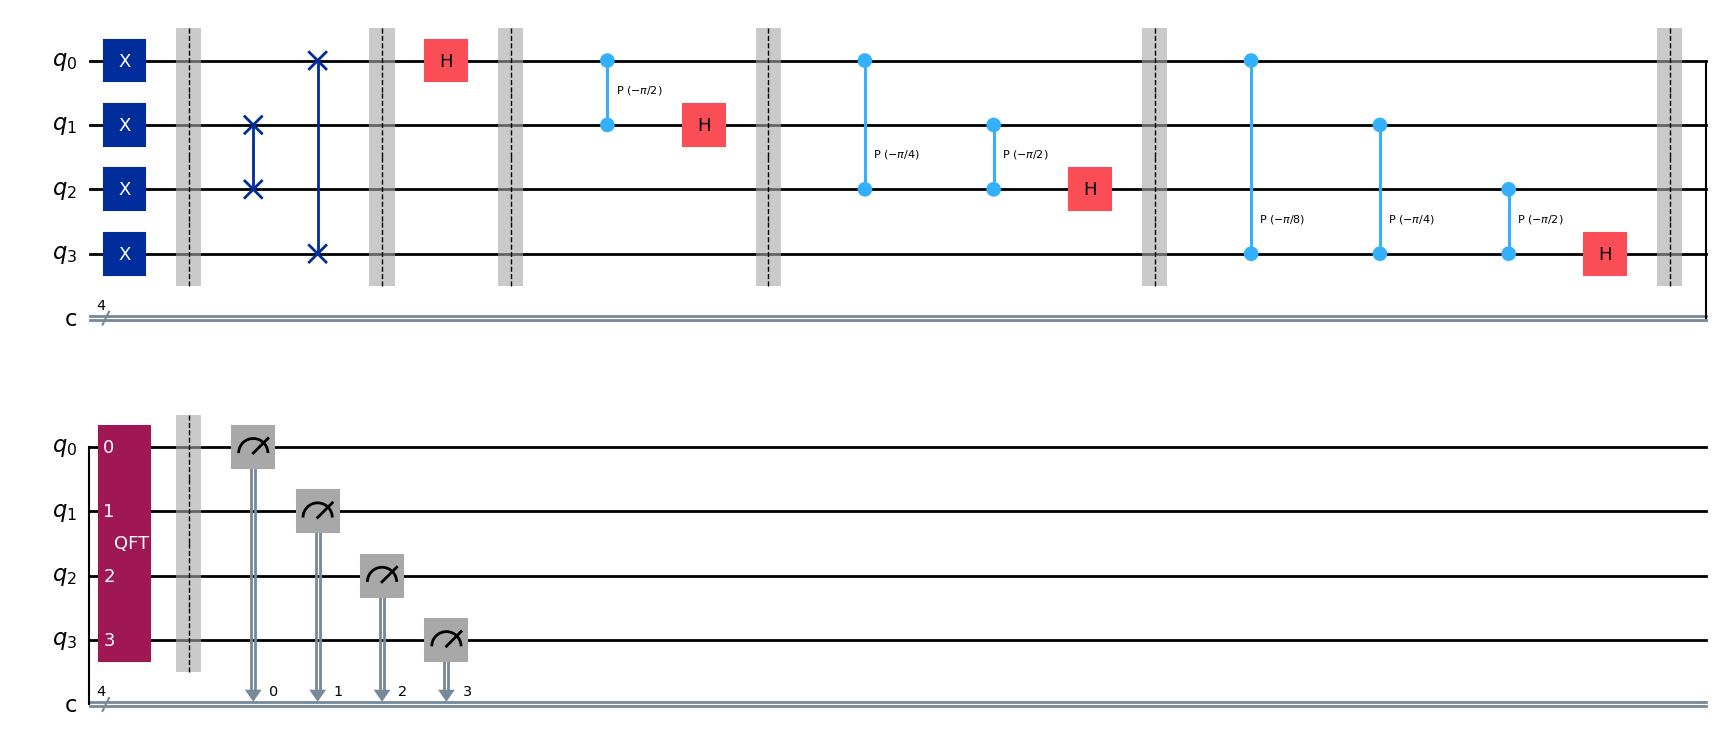

In [5]:
#Llamando a la función
muestra_comb = verificar_qft_inv(4)

#### 2. Escribe el código para estimar la fase $\phi=0.15625$.

1. Escribe la función para $CU$.
   - Revisa los ejemplso de este Lab6.
2. Usa todo el código necesario pára determinar la fase.
3. Usa tu función `miQFTInv(n)` que escribiste para el ejercicio anterior.
   - No uses la clase `QFT` de Qiskit.
5. Determina con precisión el valor del tamaño del registro $t$.
   1. Calcula numéricamente este valor. Usa $m=4$ y $\varepsilon=0.1$.
   2. Valida con un ciclo si el valor calculado de $t$ es correcto o si con otro valor se puede calcular $\phi$ con toda precisión.
   3. Escribe en una celda de markdown el valor correcto de $t$.

##### Escribiendo la función CU

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

#Función del operador U controlado CU
def CU(circuit, power, qcontrol, target):
    circuit.cp((2*np.pi * 0.15625) * (2**power), qcontrol, target)

##### Determinando la fase usando la función `miQFTInv(n)`

In [27]:
#Generando ciclo para obtener los valores de la fase con distintos tamaños del registro t
#Donde el límite es t = 6, por el valor obtenido con la expresión matemática 
for t in range(1, 7):

    # número de qubits en el registro que almacena el eigenvector 
    n = 1         
    
    # Cubits de control
    control = QuantumRegister(t, 'j') 
    # Cubits objetivo
    target = QuantumRegister(n, 'psi')   

    # Creando el circuito
    circuit = QuantumCircuit(control, target)
    # Aplicando Hadamard al cubit de control
    circuit.h(control)   
    # Cambiando el estado del cubit objetivo a |1>
    circuit.x(target)                       
    
    # Aplicando los operadores controlados
    for j in reversed(range(t)):
        CU(circuit, j, control[j], target)

    #Usando la función miQFTInv(n)
    qftInv = miQFTInv(t)
    circuit.compose(qftInv, inplace=True, qubits=control)

    #Agregando mediciones al circuito con bits clásicos
    cr = ClassicalRegister(t, 'res')            
    circuit.add_register(cr)
    circuit.measure(control, cr)

    #---------------------- Simulación ----------------------------
    sampler = StatevectorSampler()
    job_sampler = sampler.run([circuit])
    job_sampler.result()
    data = job_sampler.result()[0].data.res.get_counts()
    # Encuentra la llave (número medido) con el valor máximo
    max_key = max(data, key=data.get)         
    max_value = data[max_key]
    freq = int(max_key, 2)                     

    # Mostrando resultados
    print(t, ":\t phi =", freq/2**t)

1 :	 phi = 0.0
2 :	 phi = 0.25
3 :	 phi = 0.125
4 :	 phi = 0.125
5 :	 phi = 0.15625
6 :	 phi = 0.15625


##### Determinando con precisión el valor del tamaño del registro $t$.

Teniendo en cuenta los valores iniciales $m=4$ y $\varepsilon=0.1$. Se puede obtener el valor del tamaño del registro $t$ usando la siguiente expresión:

$$ t = m + \left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil $$

Por lo que, sitituyendo lo valores se obtiene lo siguiente:

$$ t = 4 + \left \lceil \log \left (2 + \frac{1}{2(0.1)} \right) \right \rceil = 6.80735$$

Tomando en cuenta que es un $log$ de base 2. El tamaño del registro $t$ es:

$$t = 6.807735 \approx 6$$

Al verificar el tamaño del registro $t$ con el código de la estimación de fase. El valor de $t$ para determinar con precisión la fase $\phi$ es a partir del tamaño $t=5$. Aunque no es el mismo que valor calculado, tambien tiene una buena precisión si se utiliza $t = 6$